# Project: Multi-Omics Integration for Personalised Medicine

This Jupyter notebook will guide you through the project in the Introduction to Multi-Omics Integration and Visualisation course at EMBL-EBI. You'll explore how to use Multi-Omics Factor Analysis (MOFA) to analyze a dataset of Chronic Lymphocytic Leukemia patients. All practical exercises will take place within this notebook, ensuring you have everything you need in one place.

In [3]:
import os
import numpy as np
import pandas as pd
import anndata as ad
import mudata as md
import muon as mu
import mofax as mfx
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import decoupler as dc

Matplotlib is building the font cache; this may take a moment.


## Prerequisites

Before getting started, ensure you're familiar with some key Python packages used in this project. The links below provide helpful introductions.

### NumPy
A library for numerical computing, providing the np.array class for vector and matrix operations. In this project, numerical data (e.g., mRNA counts) will typically be stored as NumPy arrays.

[NumPy Quickstart](https://numpy.org/doc/2.2/user/quickstart.html)

### Pandas
A powerful library for working with tabular data, offering the pd.DataFrame class. Unlike NumPy arrays, DataFrames allow labeled columns and rows, support multiple data types (e.g., integers and strings), and enable easy indexing by name.

[10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

### Matplotlib
The most widely used plotting library in Python. While mastering it takes time, this guide covers the essentials.

[Matplotlib Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html)

## Data handling

Now that you're prepared, let's dive into handling Omics and Multi-Omics data in Python. While you could work with standard arrays and DataFrames, more specialized options exist: AnnData and MuData. In the next sections, you'll get familiar with these powerful tools.

### AnnData

If you've worked with R, you probably know the SingleCellExperiment or SummarizedExperiment classes. AnnData is pretty much the same, but in Python.

<img src="graphics/anndata_schema.svg" alt="drawing" width="400"/>

An AnnData object has several key attributes:
- .X – The main data matrix, typically a count matrix with dimensions (n_observations × n_variables).
- .obs – A DataFrame containing metadata for each observation (row in .X), such as cell type or donor ID. Its index column can be accessed directly via .obs_names.
- .var – A DataFrame containing metadata for each variable (column in .X), such as a gene’s genomic location. Its index column can be accessed via .var_names.
- .obsm – A dictionary storing multi-dimensional observation data. Unlike .obs, which holds one-dimensional metadata (e.g., cell types), .obsm can store structured data like 2D UMAP coordinates or PCA components.
- .varm – The equivalent of .obsm for storing additional metadata related to variables.
- .layers – A dictionary for storing multiple versions of the data matrix (same shape as .X). This is useful for preserving raw counts while working with transformed versions (e.g., log-transformed data).
- .uns – A dictionary for miscellaneous information that doesn’t fit into observations or variables, such as dataset metadata or author contact details.
- .obsp & .varp – Rarely used; not covered in this guide.

Browse [AnnData Getting Started](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html) to learn more!

Now, let's dive into some actual code! We'll start by downloading an example AnnData object included in the ScanPy package—a powerful Python library for single-cell analysis. If you're interested in learning more, I highly recommend checking out the [ScanPy tutorials](https://scanpy.readthedocs.io/en/stable/tutorials/index.html).

In [4]:
adata = sc.datasets.pbmc3k_processed()
adata

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

#### Exercise
Take a closer look at the AnnData object and see what you can learn about the dataset. Answer the following questions—and if you need a hand, feel free to ask your favorite large language model (that's what they're here for!).

1. How many cells and genes are in the dataset?
2. Does .X contain raw mRNA counts, or has the data been processed in some way?
3. Examine the 'louvain' column in the .obs DataFrame. What information does it store, and how many unique values does it contain?
4. Find the PCA (Principal Component Analysis) projection of the data. How many components are included?
5. Visualizing embeddings:
    - Create a 2D scatter plot of the UMAP embedding using Matplotlib.
    - Compare it to the t-SNE embedding—do they look similar?
    - Color the dots by cell type.
    - Generate a plot showing only one cell type (subset the AnnData object before plotting).
    - Try using ScanPy’s built-in plotting functions instead of Matplotlib.


1. this dataset contains 2638 genes and 1838 cells.
2. .X has been processed, as there are negative values. Inspection on meta data:  [[-0.17146951 -0.28081203 -0.04667679 ... -0.09826884 -0.2090951
  -0.5312034 ]
 [-0.21458222 -0.37265295 -0.05480444 ... -0.26684406 -0.31314576
  -0.5966544 ]
 [-0.37688747 -0.2950843  -0.0575275  ... -0.15865596 -0.17087643
   1.379     ]
 ...
 [-0.2070895  -0.250464   -0.046397   ... -0.05114426 -0.16106427
   2.0414972 ]
 [-0.19032837 -0.2263336  -0.04399938 ... -0.00591773 -0.13521303
  -0.48211113]
 [-0.33378917 -0.2535875  -0.05271563 ... -0.07842438 -0.13032717
  -0.4713379 ]]
3. the 'louvain' column contains cell type information, and its unique values are shown below. louvain
CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Megakaryocytes         15
Name: count, dtype: int64
4. It shows that after PCA, the origin

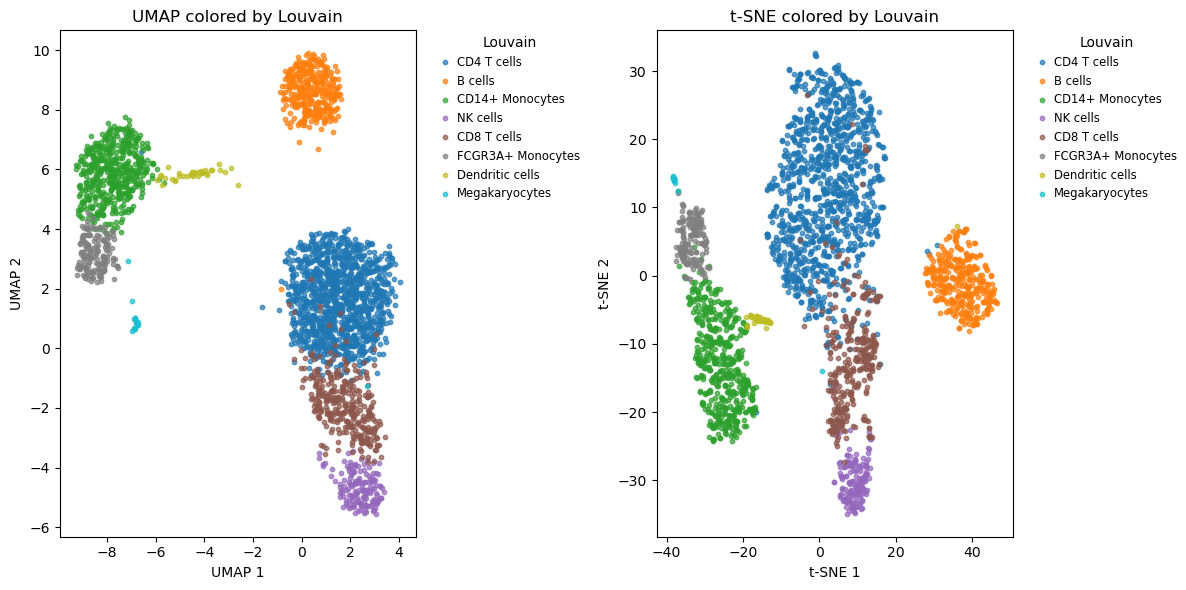

In [38]:
# your code ...

print("1. this dataset contains 2638 genes and 1838 cells.")

print("2. .X has been processed, as there are negative values. Inspection on meta data: ", adata.X)

print("3. the 'louvain' column contains cell type information, and its unique values are shown below.", adata.obs['louvain'].value_counts())

print("4. It shows that after PCA, the original data has been projected into a size", adata.obsm['X_pca'].shape, "which means that 50 cells are selected dominating main variance of the observations.")

print("5. embedding visualization - the umap and tsne plot actually look similar, they both contains three clusters of the cell types, and the composition of each cluster are similar. ")
umap = adata.obsm['X_umap']
tsne = adata.obsm['X_tsne']

# color by cell type
louvain = adata.obs['louvain']
unique_clusters = louvain.unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))
cluster_color_dict = dict(zip(unique_clusters, colors))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# UMAP plot
for cluster in unique_clusters:
    idx = louvain == cluster
    axes[0].scatter(
        umap[idx, 0], umap[idx, 1],
        s=10, alpha=0.7,
        color=cluster_color_dict[cluster],
        label=cluster
    )
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].set_title('UMAP colored by Louvain')
axes[0].legend(title='Louvain', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# t-SNE plot
for cluster in unique_clusters:
    idx = louvain == cluster
    axes[1].scatter(
        tsne[idx, 0], tsne[idx, 1],
        s=10, alpha=0.7,
        color=cluster_color_dict[cluster],
        label=cluster
    )
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE colored by Louvain')
axes[1].legend(title='Louvain', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

let's plot for CD4 T cells only:


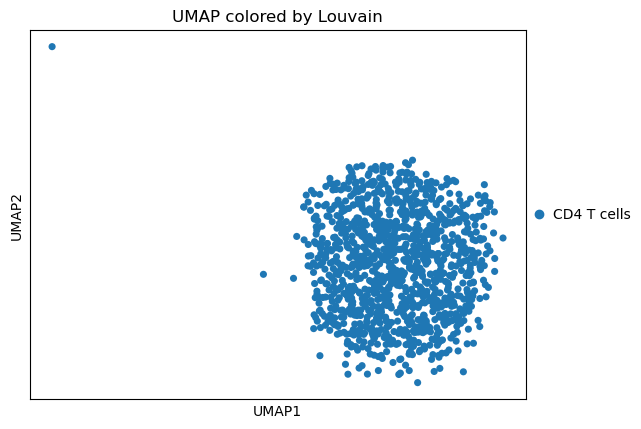

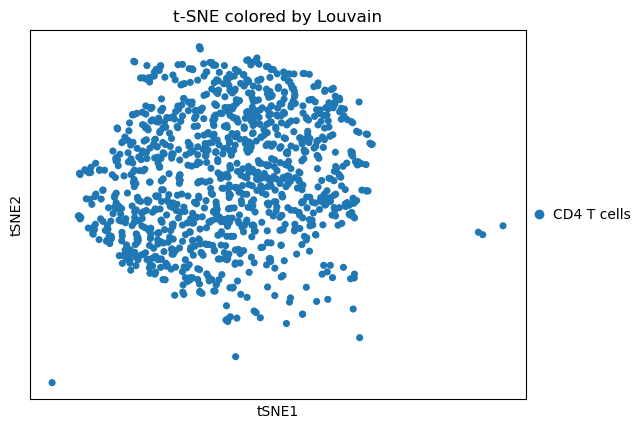

In [60]:
# Plot UMAP and t-SNE embeddings using Scanpy's built-in functions
print("let's plot for CD4 T cells only:")

sc.pl.umap(cd4t_adata, color='louvain', title='UMAP colored by Louvain')
sc.pl.tsne(cd4t_adata, color='louvain', title='t-SNE colored by Louvain')

You're probably eager to analyze your own data! In the next section, we'll explore how to create an AnnData object from a common file format: CSV. If you need to load data from other formats, check out the [ScanPy reading functions](https://scanpy.readthedocs.io/en/stable/api/reading.html). (Fun fact: ScanPy even has a built-in CSV reader—but we won’t use it here to keep things a little more hands-on!)

We'll start by exploring the Chronic Lymphocytic Leukemia (CLL) dataset, focusing on a single modality: transcriptome measurements. Before diving into the code, open the CSV file in a text editor to see how it's structured.

Now, let's begin by loading the file as a Pandas DataFrame:

In [ ]:
data = pd.read_csv("data/cll_mrna.csv", index_col=0).T

data

We've successfully loaded the data as a Pandas DataFrame, ensuring that the first column is recognized as the index. The gene names (row indices) and sample names (column headers) are already included, so we can now easily convert this DataFrame into an AnnData object.

In [ ]:
adata = ad.AnnData(data)

adata

#### Exercise
1. Check the .obs_names and .var_names attributes. Do they match the DataFrame’s index and columns?
2. The previous overview didn’t show any .obs or .var entries. Can you still access them? Why might they be missing?
3. Load the data/cll_metadata.csv file into a Pandas DataFrame and inspect it. Make sure that the "Sample" column is the index. Then, try adding the "Age4Main" column to .obs. Notice that the metadata DataFrame has 265 rows, while the AnnData object only has 136. What does this mean? Do the sample names still align?
4. Subset the AnnData object to include only patients older than 70.
5. Load the data/cll_mutations.csv file and create another AnnData object. How many patients are included? Do they match the patients in the transcriptome data?

In [ ]:
# your code ...

### MuData

Now, let's dive into Multi-Omics data! You’ve seen how useful AnnData is, but it's designed for a single omics modality. While you could theoretically store multiple modalities in the .layers attribute, this would require identical variables and observations—which is rarely the case. So, in short… not a great idea. Instead, we use MuData!

MuData is a generalization of AnnData for Multi-Omics datasets. It allows you to combine multiple AnnData objects, where observations (samples) at leasst partially overlap but variables (features) differ. This is the perfect time to get familiar with the MuData package!

[MuData Quickstart](https://mudata.readthedocs.io/en/latest/notebooks/quickstart_mudata.html)

#### Exercise

We'll now set up the MuData object that will be used for MOFA analysis throughout the project. This involves:

1. Creating AnnData objects for each modality (transcriptome, methylation, mutations, drug response).
2. Storing these objects in a dictionary.
3. Passing the dictionary to MuData, which will automatically generate a MuData object.

##### Load the Metadata
Start by loading the metadata as before. We'll convert the categorical variables "Sex", "died" and "IGHV" to numerical values to deal with them more easily later.

In [ ]:
# your code ...

# assuming you called the DataFrame `metadata_df`
metadata_df.rename(columns={"Gender" : "Sex"}, inplace=True)
metadata_df.replace({"Sex" : {"m" : 0, "f" : 1}}, inplace=True)
metadata_df.replace({"died" : {False : 0, True : 1}}, inplace=True)
metadata_df.replace({"IGHV" : {"U" : 0, "M" : 1}}, inplace=True)
metadata_df.fillna(-1, inplace=True)

metadata_df

##### Load the Transcriptome Data
Next, load the transcriptome data as before. However, you might have noticed that the .var_names attribute contains ENSEMBL Gene IDs, while we want to use Gene Symbols instead.

The mapping between ENSEMBL IDs and Gene Symbols is stored in the cll_gene_ids.csv file. Some pre-written code is available to help with this conversion—go ahead and use it!

In [ ]:
# your code ...

# assuming you called the AnnData object `adata_mrna`
gene_ids = pd.read_csv(os.path.join("data/cll_gene_ids.csv"), index_col=0)
cols = list(mrna_adata.var_names)
cols = [gene_ids.loc[gene_ids["GENEID"] == gene, "SYMBOL"].item() for gene in cols]
mrna_adata.var_names = cols

mrna_adata

##### Load the Mutations Data
Now, load the mutations data from data/cll_mutations.csv.

Since we’ll be combining multiple AnnData objects into a MuData object, each must have unique variable names. However, there's a potential issue: The .var_names in the mutations data may be gene names, which are already used in the transcriptome AnnData.

To avoid conflicts, some pre-written code automatically prepends "m_" to each variable name in the mutations data, ensuring uniqueness. Go ahead and apply this fix!

In [ ]:
# your code ...

# assuming you called the AnnData object `adata_mutations`
mutations_adata.var_names = [f"m_{x}" for x in mutations_adata.var_names]

mutations_adata

##### Load the Methylation Data
Next, load the methylation data from data/cll_methylation.csv.

In [ ]:
# your code ...

##### Load the Drug Response Data
Load the drug response data from data/cll_drugs.csv. This only contains the drug IDs, and we will replace them with the drug names using the pre-written code.

In [ ]:
# your code ...

# assuming you called the AnnData object `adata_drugs`
drug_names = pd.read_csv("data/drugs.txt", sep=",", index_col=0)
mapping = drug_names["name"].to_dict()
cols = []
for k in drugs_adata.var_names:
    for v in mapping.keys():
        if v in k:
            cols.append(k.replace(v, mapping[v]))
            break

drugs_adata.var_names = cols

drugs_adata

##### Combine Modalities and Load Metadata
Now that you’ve prepared all the AnnData objects, it's time to combine them into a MuData object! Create a dictionary `modality_dict`, where:
- The keys are the names of the individual modalities (e.g., "mrna", "methylation", "mutations", "drugs").
- The values are the corresponding AnnData objects.

Then, create a MuData object from this dictionary using `mdata = md.MuData(modality_dict)` and add metadata using `mdata.obs = metadata.loc[mdata.obs_names]` (assuming you named your metadata DataFrame metadata).

Now your MuData object is ready for analysis!

In [ ]:
# your code ...

Well done. Data preparation is often the most time-consuming and challenging part of a data analysis project, but it sets the foundation for everything that follows. The next steps will be more focused on analysis and interpretation.

#### Exercise
Before moving forward, take some time to develop an intuition for the dataset.
1. Check for missing values: What percentage of values are missing in each modality? How many features does each modality contain?
2. Interpret the data matrix: What do the numerical values in each modality represent?
3. Visualize the data distribution: Use the histplot function from the seaborn package to plot the distribution of values for each modality. What should you expect this distribution to look like?

Understanding these aspects will help in making informed decisions during analysis.

In [ ]:
# your code ...

## Training a MOFA Model

Now that the data is prepared, we are ready to train the MOFA model. This step is straightforward thanks to the structured data format we have set up.

While the original mofapy2 package can be used for this, a more convenient option is the muon package, which provides a simplified interface for multi-omics analysis. muon supports MuData objects directly while still using mofapy2 behind the scenes.

In the next steps, we will train the MOFA model using muon and explore its results.

In [ ]:
# if you're not sure about your prepared mdata object, uncomment the following lines
# from data_loader import load_cll
# mdata = load_cll()

# assuming you called the MuData object `mdata``
mu.tl.mofa(
    mdata,
    use_obs="union",
    n_factors=15,
    convergence_mode="slow",
    outfile="models/cll.hdf5",
    save_metadata=True,
    save_data=True,
    verbose=False,
    ard_weights=True,
    ard_factors=True,
    spikeslab_weights=True,
    spikeslab_factors=False,
    seed=42,
)


#### Exercise

Make sure you understand all the input parameters of MOFA. If you're not sure, it's a good idea to look them up in the [documentation](https://muon.readthedocs.io/en/latest/omics/multi.html).

### Inspection of the trained model

We'll now have a look at the result of our model training. For this, we'll load the trained model with mofax, a package to work with and visualise trained MOFA models.

In [ ]:
model = mfx.mofa_model("models/cll.hdf5")
model

In [ ]:
mfx.plot_data_overview(model)

One useful property of a trained MOFA model is its ability to quantify the explained variance (R²) for each factor in every modality. This helps assess the importance of different factors across modalities.

If a factor explains little to no variance in any modality, it is likely not very informative and can be deprioritized in further analysis. Instead, focus on factors that contribute significantly to one or more modalities, as these are more likely to capture meaningful biological variation.

In [ ]:
mfx.plot_r2(model)

Examining the correlation of factor scores is also important. If two or more factors are highly correlated, they may be capturing the same underlying variation. In such cases, it might be reasonable to focus on just one of them to simplify the analysis without losing meaningful information.

In [ ]:
mfx.plot_factors_correlation(model)

#### Exercise

1. Train a second MOFA model with a different number of factors. Make sure to save it under a different name. Load the new model using mofax and re-plot the explained variance and factor score correlations. Do you observe similar patterns compared to the first model?
2. Compare total explained variance: How does the total explained variance change between the two models? Is the difference in variance explained consistent with what you expected?
3. Choosing the right number of factors:
   - Why is selecting too many factors problematic?
   - Why can too few factors limit the model’s usefulness?
   - What is the trade-off between interpretability and capturing meaningful variation?

Understanding these points will help optimize MOFA for meaningful biological insights.

In [ ]:
# Your code ...

## Downstream Analysis Part I - Understanding the Factor Scores

The factor scores matrix has dimensions (n_samples × n_factors), meaning that for each sample, we have a set of inferred factor values. These scores capture patterns and variation in the multi-omics data.

You can extract the factor scores as a NumPy array, giving you full flexibility for custom analysis and visualization. However, both mofax and muon provide built-in plotting functions to simplify the process.

In the next steps, we will explore how to analyze and interpret these factor scores effectively.

In [ ]:
model = mfx.mofa_model("models/cll.hdf5")
factor_scores = model.get_factors()

print(type(factor_scores))
print(factor_scores.shape)

To make the factor scores easier to interpret, we can convert the NumPy array into a Pandas DataFrame and add appropriate row and column labels:
- Rows represent samples (referred to as "cells" in mofax, but these are bulk samples in our case).
- Columns represent factors, making it clear which factor score corresponds to which sample.

This structured format makes the data easier to analyze, sort, and visualize.

In [ ]:
factor_scores_df = pd.DataFrame(
    factor_scores,
    index=model.get_cells()["cell"].values,
    columns=[f"Factor {i}" for i in range(1, factor_scores.shape[1]+1)],
    )

factor_scores_df

We can visualize the factor scores using a heatmap:

In [ ]:
sns.heatmap(factor_scores_df, cmap="vlag", center=0)

We can visualize the relationship between two individual factors by using the plot_factors_scatter function.

This scatter plot helps identify potential correlations or patterns between factors. If the points form a clear trend (e.g., linear or clustered patterns), it suggests a relationship between the selected factors. If no structure is visible, the factors may capture independent sources of variation.

In [ ]:
mfx.plot_factors_scatter(model, x="Factor 1", y="Factor 2")

#### Exercise
1. Identify two uncorrelated factors using the factor correlation plot from earlier.
2. Create a scatter plot of their factor scores using the plot_factors_scatter function. Do you see a random distribution of points, confirming they are uncorrelated?
3. Find highly correlated or anticorrelated factors and plot their scores. How strong is the relationship?

In [ ]:
# your code ...

Some factors may naturally separate samples into distinct groups. These factors are often particularly interesting, because they tell us something about the biological differences between those groups. It’s useful to check whether these groups correspond to known metadata by coloring the dots in the scatter plot accordingly.

As you can see in the next code cell, Factor 1 differentiates patients based on IGHV mutation status.

In [ ]:
mfx.plot_factors_scatter(model, x="Factor 1", y="Factor 2", color="IGHV")

To make this correlation even more clear, we can use violin plots for visualisation.

In [ ]:
factor_scores_df["IGHV"] = model.metadata["IGHV"]
sns.violinplot(data=factor_scores_df, x="IGHV", y="Factor 1")

The IGHV mutation status was already stored in the metadata, allowing us to easily use it for coloring the scatter plot.

Now, let’s explore another variable from the mutations modality: m_trisomy12. Before using it for visualization, we need to add it to the metadata DataFrame. This ensures that we can access and plot it in the same way as other metadata variables.

Once added, you can use it to check if any factors separate samples based on trisomy 12 status.

In [ ]:
model.metadata["trisomy12"] = mdata["mutations"][:, "m_trisomy12"].X.flatten().copy()
model.metadata["trisomy12"].fillna(-1, inplace=True)

#### Exercise
1. Plot the factor scores for two factors and color the dots according to the trisomy 12 status of the respective sample. Can you find factors that separate patients by trisomy 12 status? If so, make another violin plot.
2. Make one scatter plot with one factor that separates patients by IGHV status and one that separates them by trisomy 12 status.
3. How many groups of patients seem to be present in the data set according to these factors?

In [ ]:
# your code ...

Alternatively, to check whether a factor correlates with any numerical variable, we can also use the plot_factors_covariates_correlation function from mofax to test all factors at the same time:

In [ ]:
mfx.plot_factors_covariates_correlation(
    model, covariates=mdata.obs[["Sex"]], pvalues=True
)

#### Exercise

This one might be a bit more challenging. You've seen in the plot above that Factor 1 separates samples by their IGHV status. However, there are a few samples for which we do not have this information (we set their value to -1 in the beginning). Try to use a simple machine learning algorithm for classification (I would suggest [KNN Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)) to determine these patients' IGHV status. Hint: First, train the KNN model on the factor scores without the missing samples and then use it to predict the IGHV status of the missing samples.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# your code ...

## Downstream Analysis Part II - Understanding the factor loadings
So far, we've observed that:

- Factor 1 is important across all modalities and likely captures general variation between patients.
- Factor 1 helps separate patients with and without IGHV mutation.
- Factor 3 helps distinguish patients with and without trisomy 12.

Now, let’s dive deeper into these factors by examining their factor loadings in the different modalities.

Factor loadings (or weights) describe how strongly each variable in a modality contributes to a factor. By analyzing these loadings, we can link specific variables to the factors and understand their biological relevance.

You can extract the factor loadings as NumPy arrays for each modality, which will allow you to explore the relationships between individual variables and the inferred factors.

In [ ]:
factor_loadings_mrna = model.get_weights("mrna")
factor_loadings_drugs = model.get_weights("drugs")
factor_loadings_methylation = model.get_weights("methylation")
factor_loadings_mutations = model.get_weights("mutations")

Let's convert them to DataFrames and add variable and factor names.

In [ ]:
factor_loadings_mrna_df = pd.DataFrame(
    factor_loadings_mrna,
    index=model.get_features("mrna")["feature"].values,
    columns=[f"Factor {i}" for i in range(1, factor_loadings_mrna.shape[1]+1)],
)

factor_loadings_drugs_df = pd.DataFrame(
    factor_loadings_drugs,
    index=model.get_features("drugs")["feature"].values,
    columns=[f"Factor {i}" for i in range(1, factor_loadings_drugs.shape[1]+1)],
)

factor_loadings_methylation_df = pd.DataFrame(
    factor_loadings_methylation,
    index=model.get_features("methylation")["feature"].values,
    columns=[f"Factor {i}" for i in range(1, factor_loadings_methylation.shape[1]+1)],
)

factor_loadings_mutations_df = pd.DataFrame(
    factor_loadings_mutations,
    index=model.get_features("mutations")["feature"].values,
    columns=[f"Factor {i}" for i in range(1, factor_loadings_mutations.shape[1]+1)],
)

These factor loadings can be visualised with heatmaps as well:

In [ ]:
sns.heatmap(factor_loadings_methylation_df, cmap="vlag", center=0)

We can also use the mofax plotting function plot_weights_heatmap to show the variables with the highest absolute factor loading value in a view.

In [ ]:
mfx.plot_weights_heatmap(
    model,
    n_features=10,
    view=1,
    factors=range(0, 7),
    xticklabels_size=6,
    w_abs=True,
    cmap="viridis",
    cluster_factors=False,
)


Or, alternatively as a scatter plot:

In [ ]:
ax = mfx.plot_weights(
    model,
    views="methylation",
    factors=[0, 1],
    n_features=5,
)

#### Exercise

1. Check the factor loadings for Factor 1 and Factor 3 in the mutations modality. What do you expect regarding the IGHV and trisomy 12 variables?
2. The formula for the factorisation is $$y_{nd} = \sum_d w_{dk} z_{nk},$$ where $y_{nd}$ is the data value of observation $n$ and variable $d$, $w_{dk}$ is the factor loading of variable $d$ and factor $k$, and $z_{nk}$ is the factor score of sample $n$ and factor $k$. If a variable has a high positive value in a sample, and the corresponding factor score is also positive, what does this imply for the sign of the factor loading? Validate your assumption by looking at the factor scores of Factor 1, which separates samples by their IGHV status (remember how we encoded the IGHV mutation numerically).
3. We've seen that Factor 1 has high values for patients with IGHV mutation. Have a look at the factor loadings for the same factor in other modalities (like transcriptome or drug response) now. What does it mean for a variable to have a high positive or negative loading? Can you create hypotheses about potential drug targets or drug efficacy?

In [ ]:
# Your code ...

Finally, let us try to link the individual factors to some known biological processes. This can be done using gene set enrichment analysis, a technique that takes as input a number of genes and searches a data base to identify biological processes (or anything else, depends on the data base) that involve roughly this set of genes. In our MOFA analysis, we can simply choose the genes that have an absolute value of the factor loadings above a certain threshold, because there are the genes that are important for the factor. We'll use the decoupler package for this purpose.

In [ ]:
msigdb = dc.get_resource("MSigDB")
msigdb = msigdb[msigdb["collection"] == "reactome_pathways"]
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

In [ ]:
acts, norm_acts, pvals = dc.run_gsea(factor_loadings_mrna_df.T, msigdb, source="geneset", target="genesymbol", verbose=True)

In [ ]:
acts.T

#### Exercise
1. How can this table be interpreted? 
2. Sort the rows according to the values of individual factors. Is there a factor for which the top gene sets share a common theme?
3. Try doing the same analysis with a different gene set collection.

With this, you gained quite some insight in training and analysing a MOFA model. The official part of the project is now over, hopefully you enjoyed it and learned something useful for your own research! But feel free to try out more things - there's a lot to explore and you could also look at other public multi-omics data sets and maybe find something interesting?

#### Additional Exercises (if you have time and according to your interests)
1. Browse the [MOFA website](https://biofam.github.io/MOFA2/index.html)
2. Try to train a MOFA model on the same data in R
3. What is MEFISTO about? If you're interested, read [the paper](https://www.nature.com/articles/s41592-021-01343-9) or look into one of the [tutorials](https://biofam.github.io/MOFA2/MEFISTO.html).
4. Find another public Multi-Omics dataset and apply MOFA (look for example [here](https://github.com/PMBio/mudatasets/tree/main/mudatasets/datasets))
5. If you want to deep dive in developing your own factor models, have a look at the probabilistic programming language [Pyro](https://pyro.ai/). You can find a very basic factor model to build on, implemented in Pyro, [here](https://github.com/florinwalter/pyro_models/blob/main/src/models/factor_analysis.py).